### This is a .ipynb file for data analysis
Group Name: forAllA

In [8]:
# Install required packages using pip package manager in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

In [10]:
# NumPy, Pandas
import numpy as np
import pandas as pd

# Visualisation
# MatPlotLib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn
import seaborn as sns
plt.style.use('ggplot')

# pd.set_option('display.width', 300, 'display.max_rows', 300, 'max_colwidth', None)
pd.set_option('max_colwidth', None)

In [11]:
# Read csv file
df = pd.read_csv('../data/imdb_sciFi.csv')

In [12]:
# browse the data of df
df.head(1)

,Unnamed: 0,movie,year,imdb,votes,summary,storyline
0,0,Inception,2010,8.8,2037592,A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,"Dom Cobb is a skilled thief, the absolute best in the dangerous art of extraction, stealing valuable secrets from deep within the subconscious during the dream state, when the mind is at its most vulnerable. Cobb's rare ability has made him a coveted player in this treacherous new world of corporate espionage, but it has also made him an international fugitive and cost him everything he has ever loved. Now Cobb is being offered a chance at redemption. One last job could give him his life back but only if he can accomplish the impossible, inception. Instead of the perfect heist, Cobb and his team of specialists have to pull off the reverse: their task is not to steal an idea, but to plant one. If they succeed, it could be the perfect crime. But no amount of careful planning or expertise can prepare the team for the dangerous enemy that seems to predict their every move. An enemy that only Cobb could have seen coming."


In [7]:
df.columns

Index(['Unnamed: 0', 'movie', 'year', 'imdb', 'votes', 'summary', 'storyline'], dtype='object')

In [19]:
# drop the first column of the df
df = df.drop(columns=['Unnamed: 0'])
df.head(1)

,movie,year,imdb,votes,summary,storyline
0,Inception,2010,8.8,2037592,A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,"Dom Cobb is a skilled thief, the absolute best in the dangerous art of extraction, stealing valuable secrets from deep within the subconscious during the dream state, when the mind is at its most vulnerable. Cobb's rare ability has made him a coveted player in this treacherous new world of corporate espionage, but it has also made him an international fugitive and cost him everything he has ever loved. Now Cobb is being offered a chance at redemption. One last job could give him his life back but only if he can accomplish the impossible, inception. Instead of the perfect heist, Cobb and his team of specialists have to pull off the reverse: their task is not to steal an idea, but to plant one. If they succeed, it could be the perfect crime. But no amount of careful planning or expertise can prepare the team for the dangerous enemy that seems to predict their every move. An enemy that only Cobb could have seen coming."


## We delete some stopwords and punctuations from our dataset by using *nltk*, in order to get some meaningful words.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   movie       250 non-null    object 
 2   year        250 non-null    int64  
 3   imdb        250 non-null    float64
 4   votes       250 non-null    int64  
 5   summary     250 non-null    object 
 6   storyline   250 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 13.8+ KB


In [15]:
df['summary']

0                                                                                          A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.
1                                                      When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.
2                                                                                                                                               A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
3                                                                               Earth's mightiest heroes must come together and learn to fight as a team if they are going to stop the mischievous Loki and his alien army from enslaving humanity.
4      Luke Skywalker jo

In [16]:
import nltk
nltk.download('stopwords') #stopwords
nltk.download('punkt') #punctuation

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


stopWords = set(stopwords.words('english')) 

df['summary'] = df.summary.apply(lambda x: word_tokenize(x))
df['summary'] = df.summary.apply(lambda x: [w for w in x if w not in stopWords])
df['summary'] = df.summary.apply(lambda x: ' '.join(x))

df['storyline'] = df.storyline.apply(lambda x: word_tokenize(x))
df['storyline'] = df.storyline.apply(lambda x: [w for w in x if w not in stopWords])
df['storyline'] = df.storyline.apply(lambda x: ' '.join(x))

df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooyiktung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooyiktung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,movie,year,imdb,votes,summary,storyline
0,0,Inception,2010,8.8,2037592,A thief steals corporate secrets use dream-sharing technology given inverse task planting idea mind C.E.O .,"Dom Cobb skilled thief , absolute best dangerous art extraction , stealing valuable secrets deep within subconscious dream state , mind vulnerable . Cobb 's rare ability made coveted player treacherous new world corporate espionage , also made international fugitive cost everything ever loved . Now Cobb offered chance redemption . One last job could give life back accomplish impossible , inception . Instead perfect heist , Cobb team specialists pull reverse : task steal idea , plant one . If succeed , could perfect crime . But amount careful planning expertise prepare team dangerous enemy seems predict every move . An enemy Cobb could seen coming ."
1,1,The Matrix,1999,8.7,1655041,"When beautiful stranger leads computer hacker Neo forbidding underworld , discovers shocking truth -- life knows elaborate deception evil cyber-intelligence .","Thomas A. Anderson man living two lives . By day average computer programmer night hacker known Neo . Neo always questioned reality , truth far beyond imagination . Neo finds targeted police contacted Morpheus , legendary computer hacker branded terrorist government . As rebel machines , Neo must confront agents : super-powerful computer programs devoted stopping Neo entire human rebellion ."
2,2,Interstellar,2014,8.6,1483109,A team explorers travel wormhole space attempt ensure humanity 's survival .,"Earth 's future riddled disasters , famines , droughts . There one way ensure mankind 's survival : Interstellar travel . A newly discovered wormhole far reaches solar system allows team astronauts go man gone , planet may right environment sustain human life ."
3,3,The Avengers,2012,8.0,1251270,Earth 's mightiest heroes must come together learn fight team going stop mischievous Loki alien army enslaving humanity .,"Nick Fury director S.H.I.E.L.D. , international peace-keeping agency . The agency 's Marvel Super Heroes , Iron Man , The Incredible Hulk , Thor , Captain America , Hawkeye Black Widow . When global security threatened Loki cohorts , Nick Fury team need powers save world disaster formed Loki team"
4,4,Star Wars: Episode IV - A New Hope,1977,8.6,1217538,"Luke Skywalker joins forces Jedi Knight , cocky pilot , Wookiee two droids save galaxy Empire 's world-destroying battle station , also attempting rescue Princess Leia mysterious Darth Vader .","The Imperial Forces , orders cruel Darth Vader , hold Princess Leia hostage efforts quell rebellion Galactic Empire . Luke Skywalker Han Solo , captain Millennium Falcon , work together companionable droid duo R2-D2 C-3PO rescue beautiful princess , help Rebel Alliance restore freedom justice Galaxy ."


## Data Visulizaiton
### More words appeared in the 60s and 70s --- Show by Word Cloud
<p align='justify'>After cleaning the words, we create a new dataframe which shows the data in the 1960s and 1970s. Next, we combine the column "summary" with column "storyline" to generate a new column named "summary_line" and find out the most used words in the summaries and storylines.</p>

In [23]:
scifi6070=df.loc[df['year'].isin(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'])]
scifi6070['summary_storyline']=scifi6070['summary'] + scifi6070['storyline']
scifi6070

<ipython-input-23-248c504ed3b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi6070['summary_storyline']=scifi6070['summary'] + scifi6070['storyline']


,movie,year,imdb,votes,summary,storyline,summary_storyline
4,Star Wars: Episode IV - A New Hope,1977,8.6,1217538,"Luke Skywalker joins forces Jedi Knight , cocky pilot , Wookiee two droids save galaxy Empire 's world-destroying battle station , also attempting rescue Princess Leia mysterious Darth Vader .","The Imperial Forces , orders cruel Darth Vader , hold Princess Leia hostage efforts quell rebellion Galactic Empire . Luke Skywalker Han Solo , captain Millennium Falcon , work together companionable droid duo R2-D2 C-3PO rescue beautiful princess , help Rebel Alliance restore freedom justice Galaxy .","Luke Skywalker joins forces Jedi Knight , cocky pilot , Wookiee two droids save galaxy Empire 's world-destroying battle station , also attempting rescue Princess Leia mysterious Darth Vader .The Imperial Forces , orders cruel Darth Vader , hold Princess Leia hostage efforts quell rebellion Galactic Empire . Luke Skywalker Han Solo , captain Millennium Falcon , work together companionable droid duo R2-D2 C-3PO rescue beautiful princess , help Rebel Alliance restore freedom justice Galaxy ."
25,Alien,1979,8.4,779638,"After space merchant vessel receives unknown transmission distress call , one crew attacked mysterious life form soon realize life cycle merely begun .","In distant future , crew commercial spaceship Nostromo way home pick distress call distant moon . The crew obligation investigate spaceship descends moon afterwards . After rough landing , three crew members leave spaceship explore area moon . At time discover hive colony unknown creature , ship 's computer deciphers message warning , distress call . When one eggs disturbed , crew realizes alone spaceship must deal consequences .","After space merchant vessel receives unknown transmission distress call , one crew attacked mysterious life form soon realize life cycle merely begun .In distant future , crew commercial spaceship Nostromo way home pick distress call distant moon . The crew obligation investigate spaceship descends moon afterwards . After rough landing , three crew members leave spaceship explore area moon . At time discover hive colony unknown creature , ship 's computer deciphers message warning , distress call . When one eggs disturbed , crew realizes alone spaceship must deal consequences ."
28,A Clockwork Orange,1971,8.3,750281,"In future , sadistic gang leader imprisoned volunteers conduct-aversion experiment , n't go planned .","Protagonist Alex DeLarge `` ultraviolent `` youth futuristic Britain . As luck , eventually runs 's arrested convicted murder rape . While prison , Alex learns experimental program convicts programmed detest violence . If goes program , sentence reduced back streets sooner expected . But Alex 's ordeals far hits streets Britain ..","In future , sadistic gang leader imprisoned volunteers conduct-aversion experiment , n't go planned .Protagonist Alex DeLarge `` ultraviolent `` youth futuristic Britain . As luck , eventually runs 's arrested convicted murder rape . While prison , Alex learns experimental program convicts programmed detest violence . If goes program , sentence reduced back streets sooner expected . But Alex 's ordeals far hits streets Britain .."
51,2001: A Space Odyssey,1968,8.3,596539,"After discovering mysterious artifact buried beneath Lunar surface , mankind sets quest find origins help intelligent supercomputer H.A.L . 9000 .","`` 2001 `` story evolution . Sometime distant past , someone something nudged evolution placing monolith Earth ( presumably elsewhere throughout universe well ) . Evolution enabled humankind reach moon 's surface , yet another monolith found , one signals monolith placers humankind evolved far . Now race begins computers ( HAL ) human ( Bowman ) reach monolith placers . The winner achieve next step evolution , whatever may .","After discovering mysterious artifact buried beneath Lunar surface , mankind sets quest find origins help intelligent supercomputer H.A.L . 9000 .`` 2001

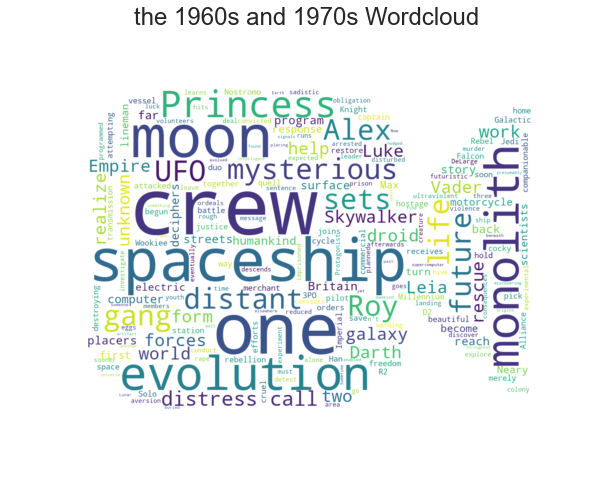

In [8]:
from PIL import Image
cloud_mask = np.array(Image.open('../figures/video_mask.png'))
from wordcloud import WordCloud, ImageColorGenerator
sns.set(rc={'figure.figsize':(11.7,8.27)})

QuaAN = ' '.join(scifi6070['summary_storyline'].tolist())

wordcloud = WordCloud (mask= cloud_mask,background_color="white").generate(QuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('the 1960s and 1970s Wordcloud',size=24)
plt.show()

### The result of the 60s and 70s
<p align='justify'>As is shown in "the 1960s and 1970s Wordcloud", we could find that the most used words when describing the science fiction movie in the 1960s and the 1970s are "crew", "spaceship", "moon", "evolution" and "monolith".</p>

In [9]:
# Store movies from the 60s and 70s in scifi6070.csv
scifi6070.to_csv('../data/scifi6070.csv')

<p align='justify'>In addition, we want to create a new text including the content of both summaries and storylines of the 1960s' and the 1970s' science fiction movies to find out the top10 used words and their frequency.</p>

In [10]:
import pandas as pd
# choose the summary_line column to combine them together to generate a new list
def excel_one_line_to_list():
    df = pd.read_csv('../data/scifi6070.csv', usecols=[7],
                       names=None)  
    df_li = df.values.tolist()
    global result6070
    result6070 = []
    for s_li in df_li:
        result6070.append(s_li[0])
    print(result6070)
if __name__ == '__main__':
    excel_one_line_to_list()

["Luke Skywalker joins forces Jedi Knight , cocky pilot , Wookiee two droids save galaxy Empire 's world-destroying battle station , also attempting rescue Princess Leia mysterious Darth Vader .The Imperial Forces , orders cruel Darth Vader , hold Princess Leia hostage efforts quell rebellion Galactic Empire . Luke Skywalker Han Solo , captain Millennium Falcon , work together companionable droid duo R2-D2 C-3PO rescue beautiful princess , help Rebel Alliance restore freedom justice Galaxy .", "After space merchant vessel receives unknown transmission distress call , one crew attacked mysterious life form soon realize life cycle merely begun .In distant future , crew commercial spaceship Nostromo way home pick distress call distant moon . The crew obligation investigate spaceship descends moon afterwards . After rough landing , three crew members leave spaceship explore area moon . At time discover hive colony unknown creature , ship 's computer deciphers message warning , distress cal

In [11]:
# save the new list into result6070.txt
file = open('../data/result6070.txt', 'w')
for res in result6070:
    file.write(res)
    file.write('\n\n')
file.close()

In [13]:
# load the txt to do some data analyze
import os
import re

def order_dict(dicts, n):
    result = []
    result1 = []
    p = sorted([(k, v) for k, v in dicts.items()], reverse=True)
    s = set()
    for i in p:
        s.add(i[1])
    for i in sorted(s, reverse=True)[:n]:
        for j in p:
            if j[1] == i:
                result.append(j)
    for r in result:
        result1.append(r[0])

    return result1


def order_dict1(dicts, n): 
    list1 = sorted(dicts.items(), key=lambda x: x[1])

    return list1[-1:-(n + 1):-1]
    # return list1[-2:-(n+2):-1]  


if __name__ == "__main__":
    # open txt
    f = open('../data/result6070.txt', "r",encoding='UTF-8')
    txt = f.read()
    txt = txt.lower()  
    f.close()

    # split word
    array = re.split('[ ,.\n]', txt)

    # count word frequency
    dic = {}
    for i in array:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1

    # delete the meaningless word(dirty word)
    del [dic['in'],dic["'s"],dic['``'],dic[''],dic[')'],dic['('],dic['the'],dic['after']]

    print('\n')
    print(order_dict1(dic, 10))



[('crew', 5), ('monolith', 4), ('evolution', 4), ('moon', 4), ('spaceship', 4), ('one', 4), ('ufo', 3), ('roy', 3), ('sets', 3), ('alex', 3)]


As a result, the word "crew" ranks first when describing the science fiction movie during the 1960s and 1970s. And the word "monolith", "evolution", "moon", "spaceship", "ufo", "roy" and "alex" were also used frequently in description of the science fiction movie.

### More words appeared in the 80s --- Show by Word Cloud
<p align='justify'>The same as above, we create another new dataframe which shows the data in the 1980s. We combine the column "summary" with column "storyline" to generate a new column named "summary_line" in order to find out the most used words in the summaries and storylines.</p>

In [14]:
scifi80 = df.loc[df['year'].isin(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'])]
scifi80['summary_storyline'] = scifi80['summary'] + scifi80['storyline']
scifi80

<ipython-input-14-b1c92de47470>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi80['summary_storyline']=scifi80['summary']+scifi80['storyline']


,movie,year,imdb,votes,summary,storyline,summary_storyline
6,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1145715,"After Rebels brutally overpowered Empire ice planet Hoth , Luke Skywalker begins Jedi training Yoda , friends pursued Darth Vader bounty hunter named Boba Fett galaxy .","Luke Skywalker , Han Solo , Princess Leia Chewbacca face attack Imperial forces AT-AT walkers ice planet Hoth . While Han Leia escape Millennium Falcon , Luke travels Dagobah search Yoda . Only Jedi Master 's help Luke survive Dark Side Force beckons ultimate duel Darth Vader .","After Rebels brutally overpowered Empire ice planet Hoth , Luke Skywalker begins Jedi training Yoda , friends pursued Darth Vader bounty hunter named Boba Fett galaxy .Luke Skywalker , Han Solo , Princess Leia Chewbacca face attack Imperial forces AT-AT walkers ice planet Hoth . While Han Leia escape Millennium Falcon , Luke travels Dagobah search Yoda . Only Jedi Master 's help Luke survive Dark Side Force beckons ultimate duel Darth Vader ."
8,Back to the Future,1985,8.5,1044057,"Marty McFly , 17-year-old high school student , accidentally sent thirty years past time-traveling DeLorean invented close friend , eccentric scientist Doc Brown .","Marty McFly , typical American teenager Eighties , accidentally sent back 1955 plutonium-powered DeLorean `` time machine '' invented slightly mad scientist . During often hysterical , always amazing trip back time , Marty must make certain teenage parents-to-be meet fall love - get back future .","Marty McFly , 17-year-old high school student , accidentally sent thirty years past time-traveling DeLorean invented close friend , eccentric scientist Doc Brown .Marty McFly , typical American teenager Eighties , accidentally sent back 1955 plutonium-powered DeLorean `` time machine '' invented slightly mad scientist . During often hysterical , always amazing trip back time , Marty must make certain teenage parents-to-be meet fall love - get back future ."
13,Star Wars: Episode VI - Return of the Jedi,1983,8.3,939117,"After daring mission rescue Han Solo Jabba Hutt , Rebels dispatch Endor destroy second Death Star . Meanwhile , Luke struggles help Darth Vader back dark side without falling Emperor 's trap .","Luke Skywalker battles Jabba Hutt Darth Vader save comrades Rebel Alliance triumph Galactic Empire . Han Solo Princess Leia reaffirm love , team Chewbacca , Lando Calrissian , Ewoks , droids C-3PO R2-D2 aid disruption Dark Side , defeat evil emperor .","After daring mission rescue Han Solo Jabba Hutt , Rebels dispatch Endor destroy second Death Star . Meanwhile , Luke struggles help Darth Vader back dark side without falling Emperor 's trap .Luke Skywalker battles Jabba Hutt Darth Vader save comrades Rebel Alliance triumph Galactic Empire . Han Solo Princess Leia reaffirm love , team Chewbacca , Lando Calrissian , Ewoks , droids C-3PO R2-D2 aid disruption Dark Side , defeat evil emperor ."
23,The Terminator,1984,8.0,793853,"A human soldier sent 2029 1984 stop almost indestructible cyborg killing machine , sent year , programmed execute young woman whose unborn son key humanity 's future salvation .","Sent back dystopian 2029 -- cold machines conquered entire world -- 1984 Los Angeles , indestructible cyborg-assassin known `` Terminator '' commences deadly mission kill humankind 's important woman : unsuspecting , Sarah Connor . However , war-torn post-apocalyptic future comes battle-scarred defender -- Kyle Reese , brave soldier human Resistance Army -- bent stopping cybernetic killer eliminating world 's last hope . But , Terminator feelings , n't sleep , , wo n't stop carries grim task . Does future lie past ?","A human soldier sent 2029 1984 stop almost indestructible cyborg killing machine , sent year , programmed execute young woman whose unborn son key humanity 's future salvation .Sent back dystopian 2029 -- cold machines conquered entire world -- 1984 Los Angeles , indestructible cyborg-assassin known `` Termina

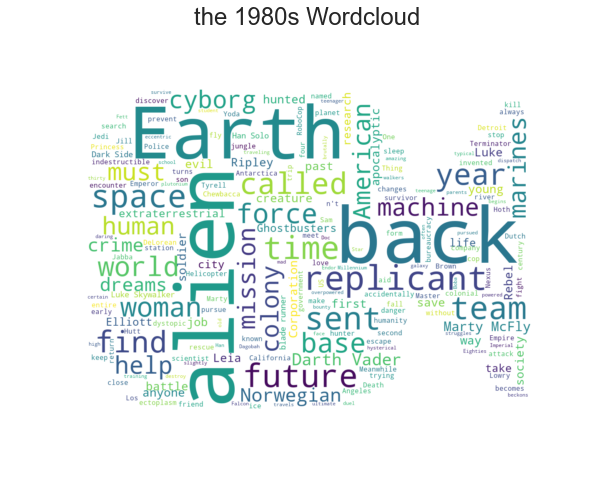

In [16]:
from PIL import Image
cloud_mask = np.array(Image.open('../figures/video_mask.png'))
from wordcloud import WordCloud, ImageColorGenerator
sns.set(rc={'figure.figsize':(11.7,8.27)})

QuaAN = ' '.join(scifi80['summary_storyline'].tolist())

wordcloud = WordCloud (mask= cloud_mask,background_color="white").generate(QuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('the 1980s Wordcloud',size=24)
plt.show()

### The result of the 1980s
From what has been shown above, the words "earth", "alien" and "back" become conspicuous in the chart. Therefore, in the 1980s the words "earth", "alien" and "back" are used frequently to depict the science fiction movie.

In [17]:
scifi80.to_csv('../data/scifi80.csv')

In [18]:
import pandas as pd
def excel_one_line_to_list():
    df = pd.read_csv('../data/scifi80.csv', usecols=[7],
                       names=None)  
    df_li = df.values.tolist()
    global result80
    result80 = []
    for s_li in df_li:
        result80.append(s_li[0])
    print(result80)
if __name__ == '__main__':
    excel_one_line_to_list()

["After Rebels brutally overpowered Empire ice planet Hoth , Luke Skywalker begins Jedi training Yoda , friends pursued Darth Vader bounty hunter named Boba Fett galaxy .Luke Skywalker , Han Solo , Princess Leia Chewbacca face attack Imperial forces AT-AT walkers ice planet Hoth . While Han Leia escape Millennium Falcon , Luke travels Dagobah search Yoda . Only Jedi Master 's help Luke survive Dark Side Force beckons ultimate duel Darth Vader .", "Marty McFly , 17-year-old high school student , accidentally sent thirty years past time-traveling DeLorean invented close friend , eccentric scientist Doc Brown .Marty McFly , typical American teenager Eighties , accidentally sent back 1955 plutonium-powered DeLorean `` time machine '' invented slightly mad scientist . During often hysterical , always amazing trip back time , Marty must make certain teenage parents-to-be meet fall love - get back future .", "After daring mission rescue Han Solo Jabba Hutt , Rebels dispatch Endor destroy seco

In [19]:
file = open('../data/result80.txt', 'w')
for res in result80:
    file.write(res)
    file.write('\n\n')
file.close()

In [21]:
import os
import re

def order_dict(dicts, n):
    result = []
    result1 = []
    p = sorted([(k, v) for k, v in dicts.items()], reverse=True)
    s = set()
    for i in p:
        s.add(i[1])
    for i in sorted(s, reverse=True)[:n]:
        for j in p:
            if j[1] == i:
                result.append(j)
    for r in result:
        result1.append(r[0])

    return result1

def order_dict1(dicts, n):  
    list1 = sorted(dicts.items(), key=lambda x: x[1])

    return list1[-1:-(n + 1):-1]
    # return list1[-2:-(n+2):-1]  


if __name__ == "__main__":
    # open txt
    f = open('../data/result80.txt', "r",encoding='UTF-8')
    txt = f.read()
    txt = txt.lower()  
    f.close()

    # split word
    array = re.split('[ ,.\n]', txt)

    # count word frequency
    dic = {}
    for i in array:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1

    del [dic['in'],dic["'s"],dic['``'],dic[''],dic[')'],dic['('],dic['a']]

    print('\n')
    print(order_dict1(dic, 10))




[('back', 9), ('alien', 8), ('space', 7), ('team', 7), ('future', 7), ('sent', 7), ('called', 6), ('find', 6), ('earth', 6), ('replicants', 6)]


In the text of summaries and storylines of science fiction movies in the 1980s, we could see that the most used word was "back", and the word "alien", "space", "team", "future", "sent", "replicants" were also used frequently when describing the science fiction movie.

### More words appeared in the 90s --- Show by Word Cloud
Like the previous step, we create a new dataframe which shows the data in the 1990s. We combine the column "summary" with column "storyline" to generate a new column named "summary_line" in order to find out the most used words in the summaries and storylines.

In [22]:
scifi90=df.loc[df['year'].isin(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'])]
scifi90['summary_storyline']=scifi90['summary']+scifi90['storyline']
scifi90

<ipython-input-22-43583878eb86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi90['summary_storyline']=scifi90['summary']+scifi90['storyline']


,movie,year,imdb,votes,summary,storyline,summary_storyline
1,The Matrix,1999,8.7,1655041,"When beautiful stranger leads computer hacker Neo forbidding underworld , discovers shocking truth -- life knows elaborate deception evil cyber-intelligence .","Thomas A. Anderson man living two lives . By day average computer programmer night hacker known Neo . Neo always questioned reality , truth far beyond imagination . Neo finds targeted police contacted Morpheus , legendary computer hacker branded terrorist government . As rebel machines , Neo must confront agents : super-powerful computer programs devoted stopping Neo entire human rebellion .","When beautiful stranger leads computer hacker Neo forbidding underworld , discovers shocking truth -- life knows elaborate deception evil cyber-intelligence .Thomas A. Anderson man living two lives . By day average computer programmer night hacker known Neo . Neo always questioned reality , truth far beyond imagination . Neo finds targeted police contacted Morpheus , legendary computer hacker branded terrorist government . As rebel machines , Neo must confront agents : super-powerful computer programs devoted stopping Neo entire human rebellion ."
12,Terminator 2: Judgment Day,1991,8.5,986189,"A cyborg , identical one failed kill Sarah Connor , must protect teenage son , John Connor , advanced powerful cyborg .","Over 10 years passed since first machine called The Terminator tried kill Sarah Connor unborn son , John . The man become future leader human resistance Machines healthy young boy . However , another Terminator , called T-1000 , sent back time supercomputer Skynet . This new Terminator advanced powerful predecessor mission kill John Connor 's still child . However , Internet John face threat T-1000 alone . Another Terminator ( identical model tried failed kill Sarah Connor 1984 ) also sent back time protect . Now , battle tomorrow begun .","A cyborg , identical one failed kill Sarah Connor , must protect teenage son , John Connor , advanced powerful cyborg .Over 10 years passed since first machine called The Terminator tried kill Sarah Connor unborn son , John . The man become future leader human resistance Machines healthy young boy . However , another Terminator , called T-1000 , sent back time supercomputer Skynet . This new Terminator advanced powerful predecessor mission kill John Connor 's still child . However , Internet John face threat T-1000 alone . Another Terminator ( identical model tried failed kill Sarah Connor 1984 ) also sent back time protect . Now , battle tomorrow begun ."
15,The Truman Show,1998,8.1,926048,An insurance salesman discovers whole life actually reality TV show .,"Since birth , big fat lie defines well-organised humdrum life kind-hearted insurance salesman ambitious explorer , Truman Burbank . Utterly unaware thousands cleverly hidden cameras watching every move , nearly three decades , Truman 's entire existence pivots around wild imagination ruthlessly manipulative television producer , Christof -- all-powerful TV-God extreme 24/7 reality show : The Truman Show . As result , Truman 's picturesque neighbourhood manicured lawns uncannily perfect residents nothing elaborate state-of-the-art set , truth knows worldwide television network deep financial interests dictate . Do lab rats know forever imprisoned ?","An insurance salesman discovers whole life actually reality TV show .Since birth , big fat lie defines well-organised humdrum life kind-hearted insurance salesman ambitious explorer , Truman Burbank . Utterly unaware thousands cleverly hidden cameras watching every move , nearly three decades , Truman 's entire existence pivots around wild imagination ruthlessly manipulative television producer , Christof -- all-powerful TV-God extreme 24/7 reality show : The Truman Show . As result , Truman 's picturesque neighbourhood manicured lawns uncannily perfect residents nothing elaborate state-of-the-art set , truth knows worldwide television network d

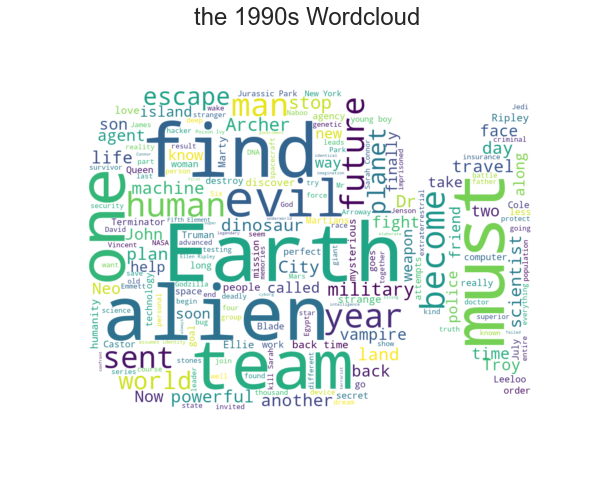

In [23]:
from PIL import Image
cloud_mask = np.array(Image.open('../figures/video_mask.png'))
from wordcloud import WordCloud, ImageColorGenerator
sns.set(rc={'figure.figsize':(11.7,8.27)})

QuaAN = ' '.join(scifi90['summary_storyline'].tolist())

wordcloud = WordCloud (mask= cloud_mask,background_color="white").generate(QuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('the 1990s Wordcloud',size=24)
plt.show()

### The result of the 1980s
The chart "the 1990s Wordcloud" depicts that the most used words in the 1990s are "find", "evil", "earth", "alien" and "team" in the desciption of science fiction movie.

In [24]:
scifi90.to_csv('../data/scifi90.csv')

In [25]:
import pandas as pd
def excel_one_line_to_list():
    df = pd.read_csv('../data/scifi90.csv', usecols=[7],
                       names=None)  
    df_li = df.values.tolist()
    global result90
    result90 = []
    for s_li in df_li:
        result90.append(s_li[0])
    print(result90)
if __name__ == '__main__':
    excel_one_line_to_list()

['When beautiful stranger leads computer hacker Neo forbidding underworld , discovers shocking truth -- life knows elaborate deception evil cyber-intelligence .Thomas A. Anderson man living two lives . By day average computer programmer night hacker known Neo . Neo always questioned reality , truth far beyond imagination . Neo finds targeted police contacted Morpheus , legendary computer hacker branded terrorist government . As rebel machines , Neo must confront agents : super-powerful computer programs devoted stopping Neo entire human rebellion .', "A cyborg , identical one failed kill Sarah Connor , must protect teenage son , John Connor , advanced powerful cyborg .Over 10 years passed since first machine called The Terminator tried kill Sarah Connor unborn son , John . The man become future leader human resistance Machines healthy young boy . However , another Terminator , called T-1000 , sent back time supercomputer Skynet . This new Terminator advanced powerful predecessor missio

In [26]:
file = open('../data/result90.txt', 'w')
for res in result90:
    file.write(res)
    file.write('\n\n')
file.close()

In [28]:
import os
import re

def order_dict(dicts, n):
    result = []
    result1 = []
    p = sorted([(k, v) for k, v in dicts.items()], reverse=True)
    s = set()
    for i in p:
        s.add(i[1])
    for i in sorted(s, reverse=True)[:n]:
        for j in p:
            if j[1] == i:
                result.append(j)
    for r in result:
        result1.append(r[0])

    return result1


def order_dict1(dicts, n):  
    list1 = sorted(dicts.items(), key=lambda x: x[1])

    return list1[-1:-(n + 1):-1]
    # return list1[-2:-(n+2):-1]  


if __name__ == "__main__":
    # open txt
    f = open('../data/result90.txt', "r",encoding='UTF-8')
    txt = f.read()
    txt = txt.lower() 
    f.close()

    # split word
    array = re.split('[ ,.\n]', txt)

    # count word frequency
    dic = {}
    for i in array:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1

    del [dic['in'],dic["'s"],dic['``'],dic[''],dic[')'],dic['('],dic['a'],dic['the'],dic['?']]

    print('\n')
    print(order_dict1(dic, 10))




[('earth', 17), ('must', 14), ('team', 11), ('time', 11), ('back', 11), ('one', 10), ('evil', 10), ('find', 9), ('new', 9), ('future', 9)]


From the text of summaries and storylines, we counted that the frequency of "earth" is the highest, and the word "must", "team", "time", "back" and other words also have high frequence showing in the desciption of the 1990s' science fiction movie.

### More words appeared in the 2000s --- Show by Word Cloud
Like the previous step, we create a new dataframe which shows the data in the 2000s. We combine the column "summary" with column "storyline" to generate a new column named "summary_line" in order to find out the most used words in the summaries and storylines.

In [29]:
scifi00=df.loc[df['year'].isin(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])]
scifi00['summary_storyline']=scifi00['summary']+scifi00['storyline']
scifi00

<ipython-input-29-625004efed13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi00['summary_storyline']=scifi00['summary']+scifi00['storyline']


,movie,year,imdb,votes,summary,storyline,summary_storyline
5,The Prestige,2006,8.5,1173673,"After tragic accident , two stage magicians engage battle create ultimate illusion sacrificing everything outwit .","In end nineteenth century , London , Robert Angier , beloved wife Julia McCullough , Alfred Borden friends assistants magician . When Julia accidentally dies performance , Robert blames Alfred death , become enemies . Both become famous rival magicians , sabotaging performance stage . When Alfred performs successful trick , Robert becomes obsessed trying disclose secret competitor tragic consequences .","After tragic accident , two stage magicians engage battle create ultimate illusion sacrificing everything outwit .In end nineteenth century , London , Robert Angier , beloved wife Julia McCullough , Alfred Borden friends assistants magician . When Julia accidentally dies performance , Robert blames Alfred death , become enemies . Both become famous rival magicians , sabotaging performance stage . When Alfred performs successful trick , Robert becomes obsessed trying disclose secret competitor tragic consequences ."
7,Avatar,2009,7.8,1110513,A paraplegic Marine dispatched moon Pandora unique mission becomes torn following orders protecting world feels home .,"When brother killed robbery , paraplegic Marine Jake Sully decides take place mission distant world Pandora . There learns greedy corporate figurehead Parker Selfridge 's intentions driving native humanoid `` Na'vi '' order mine precious material scattered throughout rich woodland . In exchange spinal surgery fix legs , Jake gathers knowledge , Indigenous Race Culture , cooperating military unit spearheaded gung-ho Colonel Quaritch , simultaneously attempting infiltrate Na'vi people use `` avatar '' identity . While Jake begins bond native tribe quickly falls love beautiful alien Neytiri , restless Colonel moves forward ruthless extermination tactics , forcing soldier take stand - fight back epic battle fate Pandora .","A paraplegic Marine dispatched moon Pandora unique mission becomes torn following orders protecting world feels home .When brother killed robbery , paraplegic Marine Jake Sully decides take place mission distant world Pandora . There learns greedy corporate figurehead Parker Selfridge 's intentions driving native humanoid `` Na'vi '' order mine precious material scattered throughout rich woodland . In exchange spinal surgery fix legs , Jake gathers knowledge , Indigenous Race Culture , cooperating military unit spearheaded gung-ho Colonel Quaritch , simultaneously attempting infiltrate Na'vi people use `` avatar '' identity . While Jake begins bond native tribe quickly falls love beautiful alien Neytiri , restless Colonel moves forward ruthless extermination tactics , forcing soldier take stand - fight back epic battle fate Pandora ."
10,V for Vendetta,2005,8.2,1022770,"In future British tyranny , shadowy freedom fighter , known alias `` V '' , plots overthrow help young woman .","In distant future , Evey Hammond average citizen United Kingdom , rule fascist tyrannical Norsefire Party . She employee state-run British Television Network , soon , becomes number one enemy state together enigmatic larger-than-life freedom fighter known letter `` V '' . V informs Evey must hide underground lair least one year , reluctant idea first , bond soon forms two individuals . In meanwhile , mysterious past V gradually revealed police inspector tasked capturing , Eric Finch , long starts questioning everything government stands .","In future British tyranny , shadowy freedom fighter , known alias `` V '' , plots overthrow help young woman .In distant future , Evey Hammond average citizen United Kingdom , rule fascist tyrannical Norsefire Party . She employee state-run British Television Network , soon , becomes number one enemy state together enigmatic larger-than-life freedom fighter known letter `` V '' . V informs Evey must hide underground lair least one year , r

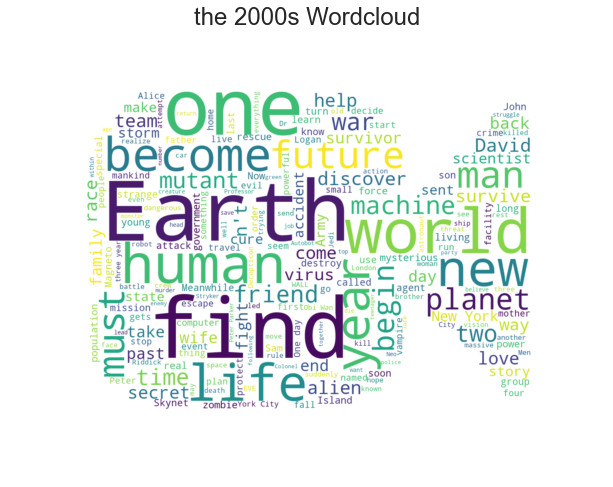

In [30]:
from PIL import Image
cloud_mask = np.array(Image.open('../figures/video_mask.png'))
from wordcloud import WordCloud, ImageColorGenerator
sns.set(rc={'figure.figsize':(11.7,8.27)})

QuaAN = ' '.join(scifi00['summary_storyline'].tolist())

wordcloud = WordCloud (mask= cloud_mask,background_color="white").generate(QuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('the 2000s Wordcloud',size=24)
plt.show()

As is shown in the chart "the 2000s Wordcloud", we could see that the most frequent words in the 2000s' science fiction movies are "one", "earth", "find" and "world".

In [31]:
scifi00.to_csv('../data/scifi00.csv')

In [32]:
import pandas as pd
def excel_one_line_to_list():
    df = pd.read_csv('../data/scifi00.csv', usecols=[7],
                       names=None)  
    df_li = df.values.tolist()
    global result00
    result00 = []
    for s_li in df_li:
        result00.append(s_li[0])
    print(result00)
if __name__ == '__main__':
    excel_one_line_to_list()

['After tragic accident , two stage magicians engage battle create ultimate illusion sacrificing everything outwit .In end nineteenth century , London , Robert Angier , beloved wife Julia McCullough , Alfred Borden friends assistants magician . When Julia accidentally dies performance , Robert blames Alfred death , become enemies . Both become famous rival magicians , sabotaging performance stage . When Alfred performs successful trick , Robert becomes obsessed trying disclose secret competitor tragic consequences .', "A paraplegic Marine dispatched moon Pandora unique mission becomes torn following orders protecting world feels home .When brother killed robbery , paraplegic Marine Jake Sully decides take place mission distant world Pandora . There learns greedy corporate figurehead Parker Selfridge 's intentions driving native humanoid `` Na'vi '' order mine precious material scattered throughout rich woodland . In exchange spinal surgery fix legs , Jake gathers knowledge , Indigenous

In [33]:
file = open('../data/result00.txt', 'w')
for res in result00:
    file.write(res)
    file.write('\n\n')
file.close()

In [42]:
import os
import re

def order_dict(dicts, n):
    result = []
    result1 = []
    p = sorted([(k, v) for k, v in dicts.items()], reverse=True)
    s = set()
    for i in p:
        s.add(i[1])
    for i in sorted(s, reverse=True)[:n]:
        for j in p:
            if j[1] == i:
                result.append(j)
    for r in result:
        result1.append(r[0])

    return result1


def order_dict1(dicts, n): 
    list1 = sorted(dicts.items(), key=lambda x: x[1])

    return list1[-1:-(n + 1):-1]
    # return list1[-2:-(n+2):-1] 

if __name__ == "__main__":
    # open txt
    f = open('../data/result00.txt', "r",encoding='UTF-8')
    txt = f.read()
    txt = txt.lower()  
    f.close()

    # split word
    array = re.split('[ ,.\n]', txt)

    dic = {}
    for i in array:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1
 
    del [dic['in'],dic["'s"],dic['``'],dic[''],dic[')'],dic['('],dic['a'],dic['the'],dic['?'],dic['-'],dic['but'],dic['he'],dic["''"]]

    print('\n')
    print(order_dict1(dic, 10))



[('one', 39), ('new', 36), ('earth', 35), ('years', 29), ('world', 29), ('life', 24), ('find', 22), ('must', 21), ('future', 21), ('planet', 20)]


As we can see from the result above, the most frequent word in the text is "one", and the word "new", "earth", "years", "world" and "life" are also used frequently when descibing the science movie in the 2000s.

### More words appeared in the 2010s --- Show by Word Cloud
And we generate a new dataframe of the 2010s' science fiction movies which also combines the column "summary" and "storyline" into a new column "summary_storyline".

In [36]:
scifi10=df.loc[df['year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])]
scifi10['summary_storyline']=scifi10['summary']+scifi10['storyline']
scifi10

<ipython-input-36-e693a0270a8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi10['summary_storyline']=scifi10['summary']+scifi10['storyline']


,movie,year,imdb,votes,summary,storyline,summary_storyline
0,Inception,2010,8.8,2037592,A thief steals corporate secrets use dream-sharing technology given inverse task planting idea mind C.E.O .,"Dom Cobb skilled thief , absolute best dangerous art extraction , stealing valuable secrets deep within subconscious dream state , mind vulnerable . Cobb 's rare ability made coveted player treacherous new world corporate espionage , also made international fugitive cost everything ever loved . Now Cobb offered chance redemption . One last job could give life back accomplish impossible , inception . Instead perfect heist , Cobb team specialists pull reverse : task steal idea , plant one . If succeed , could perfect crime . But amount careful planning expertise prepare team dangerous enemy seems predict every move . An enemy Cobb could seen coming .","A thief steals corporate secrets use dream-sharing technology given inverse task planting idea mind C.E.O .Dom Cobb skilled thief , absolute best dangerous art extraction , stealing valuable secrets deep within subconscious dream state , mind vulnerable . Cobb 's rare ability made coveted player treacherous new world corporate espionage , also made international fugitive cost everything ever loved . Now Cobb offered chance redemption . One last job could give life back accomplish impossible , inception . Instead perfect heist , Cobb team specialists pull reverse : task steal idea , plant one . If succeed , could perfect crime . But amount careful planning expertise prepare team dangerous enemy seems predict every move . An enemy Cobb could seen coming ."
2,Interstellar,2014,8.6,1483109,A team explorers travel wormhole space attempt ensure humanity 's survival .,"Earth 's future riddled disasters , famines , droughts . There one way ensure mankind 's survival : Interstellar travel . A newly discovered wormhole far reaches solar system allows team astronauts go man gone , planet may right environment sustain human life .","A team explorers travel wormhole space attempt ensure humanity 's survival .Earth 's future riddled disasters , famines , droughts . There one way ensure mankind 's survival : Interstellar travel . A newly discovered wormhole far reaches solar system allows team astronauts go man gone , planet may right environment sustain human life ."
3,The Avengers,2012,8.0,1251270,Earth 's mightiest heroes must come together learn fight team going stop mischievous Loki alien army enslaving humanity .,"Nick Fury director S.H.I.E.L.D. , international peace-keeping agency . The agency 's Marvel Super Heroes , Iron Man , The Incredible Hulk , Thor , Captain America , Hawkeye Black Widow . When global security threatened Loki cohorts , Nick Fury team need powers save world disaster formed Loki team","Earth 's mightiest heroes must come together learn fight team going stop mischievous Loki alien army enslaving humanity .Nick Fury director S.H.I.E.L.D. , international peace-keeping agency . The agency 's Marvel Super Heroes , Iron Man , The Incredible Hulk , Thor , Captain America , Hawkeye Black Widow . When global security threatened Loki cohorts , Nick Fury team need powers save world disaster formed Loki team"
9,Guardians of the Galaxy,2014,8.0,1033686,A group intergalactic criminals must pull together stop fanatical warrior plans purge universe .,"After stealing mysterious orb far reaches outer space , Peter Quill Earth main target manhunt led villain known Ronan Accuser . To help fight Ronan team save galaxy power , Quill creates team space heroes known `` Guardians Galaxy '' save galaxy .","A group intergalactic criminals must pull together stop fanatical warrior plans purge universe .After stealing mysterious orb far reaches outer space , Peter Quill Earth main target manhunt led villain known Ronan Accuser . To help fight Ronan team save galaxy power , Quill creates team space heroes known `` Guardians Galaxy '' save galaxy ."
17,Deadpool,2016,8.0,892839,"A wisecracking mercenary g

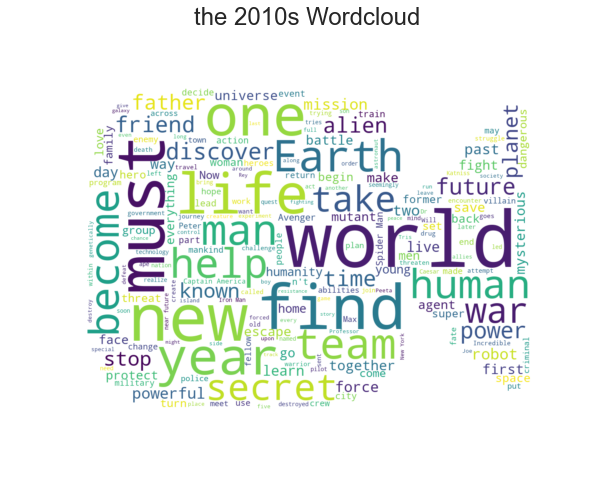

In [37]:
from PIL import Image
cloud_mask = np.array(Image.open('../figures/video_mask.png'))
from wordcloud import WordCloud, ImageColorGenerator
sns.set(rc={'figure.figsize':(11.7,8.27)})

QuaAN = ' '.join(scifi10['summary_storyline'].tolist())

wordcloud = WordCloud (mask= cloud_mask,background_color="white").generate(QuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('the 2010s Wordcloud',size=24)
plt.show()

According to the chart above, the most frequently used word in the science fiction movie in the 2010s are "must", "find", "new" and "world".

In [38]:
scifi10.to_csv('../data/scifi10.csv')

In [39]:
import pandas as pd
def excel_one_line_to_list():
    df = pd.read_csv('../data/scifi10.csv', usecols=[7],
                       names=None)  
    df_li = df.values.tolist()
    global result10
    result10 = []
    for s_li in df_li:
        result10.append(s_li[0])
    print(result10)
if __name__ == '__main__':
    excel_one_line_to_list()

["A thief steals corporate secrets use dream-sharing technology given inverse task planting idea mind C.E.O .Dom Cobb skilled thief , absolute best dangerous art extraction , stealing valuable secrets deep within subconscious dream state , mind vulnerable . Cobb 's rare ability made coveted player treacherous new world corporate espionage , also made international fugitive cost everything ever loved . Now Cobb offered chance redemption . One last job could give life back accomplish impossible , inception . Instead perfect heist , Cobb team specialists pull reverse : task steal idea , plant one . If succeed , could perfect crime . But amount careful planning expertise prepare team dangerous enemy seems predict every move . An enemy Cobb could seen coming .", "A team explorers travel wormhole space attempt ensure humanity 's survival .Earth 's future riddled disasters , famines , droughts . There one way ensure mankind 's survival : Interstellar travel . A newly discovered wormhole far r

In [40]:
file = open('../data/result10.txt', 'w')
for res in result10:
    file.write(res)
    file.write('\n\n')
file.close()

In [43]:
import os
import re

def order_dict(dicts, n):
    result = []
    result1 = []
    p = sorted([(k, v) for k, v in dicts.items()], reverse=True)
    s = set()
    for i in p:
        s.add(i[1])
    for i in sorted(s, reverse=True)[:n]:
        for j in p:
            if j[1] == i:
                result.append(j)
    for r in result:
        result1.append(r[0])

    return result1

def order_dict1(dicts, n):  
    list1 = sorted(dicts.items(), key=lambda x: x[1])

    return list1[-1:-(n + 1):-1]
    # return list1[-2:-(n+2):-1] 

if __name__ == "__main__":
    # open the txt
    f = open('../data/result10.txt', "r",encoding='UTF-8')
    txt = f.read()
    txt = txt.lower() 
    f.close()
    
    #split words
    array = re.split('[ ,.\n]', txt)

    # counting word frequency
    dic = {}
    for i in array:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1
            
    del [dic['in'],dic["'s"],dic['``'],dic[''],dic[')'],dic['('],dic['a'],dic['the'],dic['?'],dic['-'],dic['but'],dic['he'],dic['when']]
    print('\n')
    print(order_dict1(dic, 10))



[('world', 94), ('new', 70), ('must', 66), ('one', 44), ('earth', 41), ('life', 41), ('man', 37), ('future', 37), ('team', 34), ('find', 31)]


### Generate a dataframe of the 10 most frequently occurring words in five periods
In terms of the text of the summaries and storylines, we could find that in the 2010s, the most used word is "world", and the word "new", "must", "one", "earth" and "life" are also used frequently when depicting the science fiction movies.

In [49]:
import csv
rows = [['Age','top1','top2','top3','top4','top5','top6','top7','top8','top9','top10'],
        ['the 1960s and the 1970s','crew','monolith','evolution','moon','spaceship','one','ufo','roy','sets','alex'],
        ['the 1980s','back','alien','space','team','future','sent','called','find','earth','replicants'],
        ['the 1990s','earth','must','team','time','back','one','evil','find','new','future'],
        ['the 2000s','one','new','earth','years','world','life','find','must','future','planet'],
        ['the 2010s','world','new','must','one','earth','life','man','future','team','find']]

with open('../data/WordFrequency.csv','w',newline='')as csv_file:
    writer = csv.writer(csv_file)
    for row in rows:
        writer.writerow(row)

### Data Summary
1. 1960 s to 1970 s, there are many words about **crew**, **spaceship**, **moon**, and so on, we through the film and the historical events, we found that this a few word with the background of the society at that time there may be a connection.<br>The Project Apollo Project, sometimes called Apollo Project in Hong Kong, Macao and Taiwan, was a series of manned spaceflight missions undertaken by the National Aeronautics and Space Administration (NASA) from 1961 to 1972. In the decade of the 1960s, it was mainly devoted to the goal of landing a man on the moon and returning him safely to the earth. <br>The passion for technology and the desire to explore the moon were reflected in all aspects of film and drama.<br><br>
2. Another word that particularly interested us was **monolith**. We also searched some relevant film history materials to find out the reasons behind it.<br>The development of atomic bomb and nuclear war caused people's anxiety about the end of the world, which strongly influenced the science fiction films of the 1950s. The Cold War in the United States also promoted the development of science fiction films, and the golden age of science fiction films began accordingly.<br>1950s science fiction films incorporated horror and concerns about nuclear technology and threats from outer space. Not many films were made in the early sixties, after the film boom of the fifties. Films made during this period were either aimed at children or were sequels to fifties science fiction films.<br>If the films of the sixties are a sequel to the fifties, it's not hard to see why monolith came into being.<br><br>
3. In the 1980s, **Alien** and **space appeared** in the top 10. Thanks to the popularity of Star War in the 1970s, the theme of space continued to be loved by everyone. For example, Steven Spielberg's E.T. (1982) is one of the most successful films of the decade.<br><br>
4. We will become a kind of words summed up after the 90s, because after the 1990s appear high-frequency words are similar, there is frequent words **earth** and **world**, people no longer stay in space, but is more focused on the human environment, pay attention to the people and nature, earth and other planets. Of course, the reasons for these words may have something to do with economic globalization, the era of blockbuster films, high-concept films, and the cultural monopoly of American studios. However, due to the limited amount of data, these words are only listed here, which need further research.